In [10]:
import streamlit as st
import datetime as dt
import altair as alt
import pandas as pd
import requests
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, VerticalPitch ,add_image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from urllib.request import urlopen
from PIL import Image

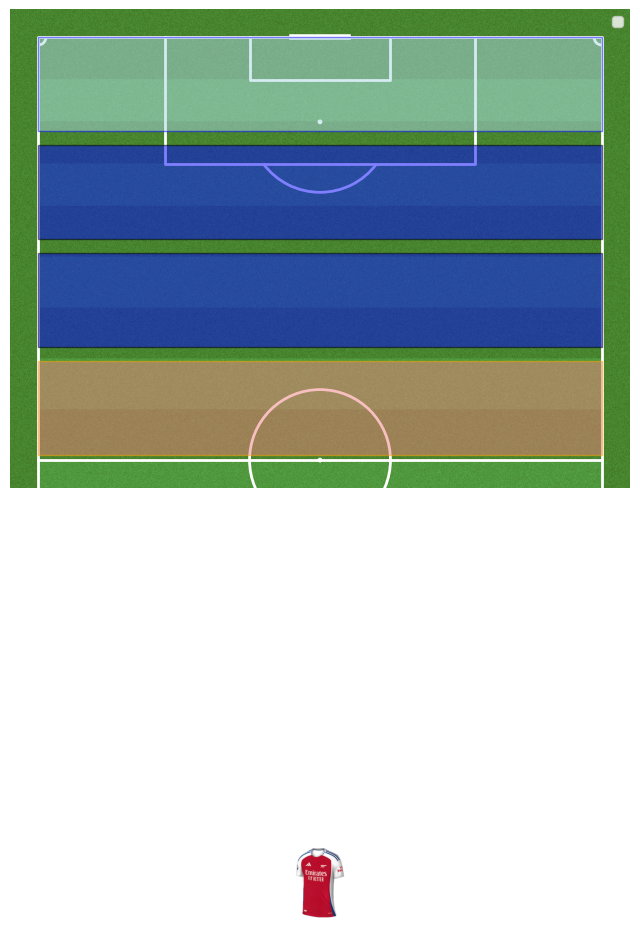

In [194]:
from matplotlib import pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.patches as patches

# Define the figure size
fig_size = (8, 8)  # Set to desired size (width, height)

# Create a vertical pitch with specified size
pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, corner_arcs=True, half=True)
fig, ax = pitch.draw(figsize=fig_size, tight_layout=False)  # Draw the pitch

# Extract pitch dimensions from the figure
pitch_length = fig.get_figheight() * 10  # Scale as needed (10 is a scaling factor)
pitch_width = fig.get_figwidth() * 10  # Scale as needed

# Define heights for each zone based on pitch length
zone_height = pitch_length / 6  # Common height for all zones
space_between_zones = 2  # Space between zones

# Draw pitch zones
# Goalkeeper Zone (at the top)
gkp_zone = patches.Rectangle((0, pitch_length + 2*zone_height), pitch_width, zone_height,
                             linewidth=1, edgecolor='blue', facecolor='lightblue', alpha=0.5)
ax.add_patch(gkp_zone)

# Defenders Zone (below the goalkeeper)
def_zone = patches.Rectangle((0, pitch_length + zone_height - space_between_zones),
                             pitch_width, zone_height, linewidth=1, edgecolor='black', facecolor='blue', alpha=0.5)
ax.add_patch(def_zone)

# Midfielders Zone (below the defenders)

mid_zone = patches.Rectangle((0, pitch_length + 1/zone_height  - space_between_zones * 2),
                             pitch_width, zone_height, linewidth=1, edgecolor='black', facecolor='blue', alpha=0.5)
ax.add_patch(mid_zone)

# Forwards Zone (starting from the bottom and going up)
fwd_zone = patches.Rectangle((0, pitch_length - zone_height - space_between_zones * 3), pitch_width, zone_height,
                             linewidth=1, edgecolor='orange', facecolor='lightcoral', alpha=0.5)
ax.add_patch(fwd_zone)



# Add legend for reference lines
ax.legend()
# Centering image in the GKP zone
IMAGE_URL = 'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_3-110.png'
image = Image.open(urlopen(IMAGE_URL))
x_image = pitch_width / 2 # Centered horizontally in the GKP zone
y_image = pitch_length + 2 * zone_height  # Centered vertically in the GKP zone

ax_image = pitch.inset_image(y_image, x_image, image, height=10, ax=ax)
plt.show()
